<a href="https://colab.research.google.com/github/suramdivyareddy/cardamageclassification/blob/main/cardamage.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalMaxPooling2D, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.applications import MobileNet
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.applications import MobileNetV3Small
from tensorflow.keras.applications import MobileNetV3Large
import numpy as np
from tqdm import tqdm
from PIL import Image, ImageFile
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten, Dropout
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential



MOBILENET

In [ ]:
print("[Info] loading imagenet weights...")
baseModel = MobileNet(weights="imagenet", include_top=False,
input_tensor=Input(shape=(224, 224, 3)))

headModel = baseModel.output
headModel = Flatten(name="flatten")(headModel)
headModel = Dense(1024, activation='relu')(headModel)
headModel = Dropout(0.5)(headModel)
headModel = Dense(1, activation='sigmoid')(headModel)

model = Model(inputs=baseModel.input, outputs=headModel)

[Info] loading imagenet weights...
17235968/17225924 [==============================] - 0s 0us/step


In [ ]:
train_datagen = ImageDataGenerator(rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')
test_datagen = ImageDataGenerator(rescale=1./255)

In [ ]:
batch_size = 32
print("[INFO] loading images...")
train_data_dir =  '/content/drive/MyDrive/cardamage/training'   #directory of training data
test_data_dir =  '/content/drive/MyDrive/cardamage/validation'    #directory of test data

[INFO] loading images...


In [ ]:
training_set = train_datagen.flow_from_directory(train_data_dir,
                                                 target_size=(224, 224),
                                                 batch_size=batch_size,
                                                 class_mode='binary')
test_set = test_datagen.flow_from_directory(test_data_dir,
                                            target_size=(224, 224),
                                            batch_size=batch_size,
                                            class_mode='binary')

Found 1840 images belonging to 2 classes.
Found 460 images belonging to 2 classes.


In [ ]:
labels = {value: key for key, value in training_set.class_indices.items()}

print("Label Mappings for classes present in the training and validation datasets\n")
for key, value in labels.items():
    print(f"{key} : {value}")

Label Mappings for classes present in the training and validation datasets

0 : 00-damage
1 : 01-whole


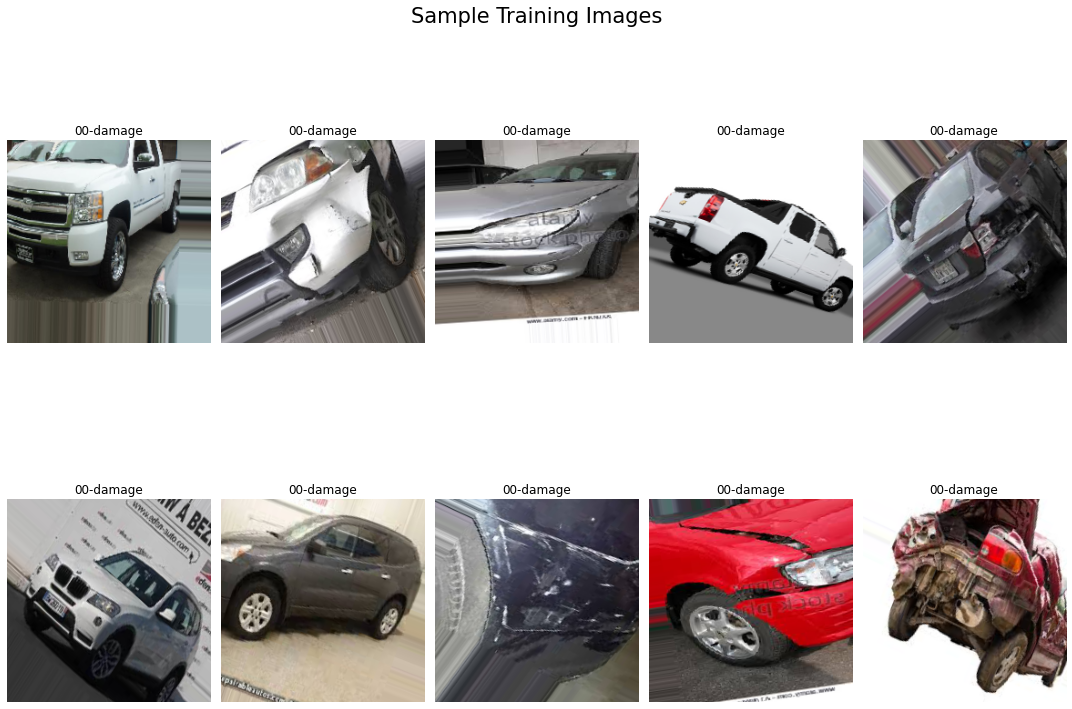

In [ ]:
fig, ax = plt.subplots(nrows=2, ncols=5, figsize=(15, 12))
idx = 0

for i in range(2):
    for j in range(5):
        label = labels[np.argmax(training_set[0][1][idx])]
        ax[i, j].set_title(f"{label}")
        ax[i, j].imshow(training_set[0][0][idx][:, :, :])
        ax[i, j].axis("off")
        idx += 1

plt.tight_layout()
plt.suptitle("Sample Training Images", fontsize=21)
plt.show()

In [ ]:

print("[INFO] compiling model...")
opt = Adam(lr=0.001)
model.compile(loss="binary_crossentropy", optimizer=opt, metrics=["accuracy"])

[INFO] compiling model...


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 112, 112, 32)     128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)     288       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, 112, 112, 32)     128       
 ation)                                                      

In [ ]:
print("[INFO] training model...")
results = model.fit(training_set,validation_data=test_set,
                        epochs=10)

[INFO] training model...
Epoch 1/10
58/58 [==============================] - 36s 617ms/step - loss: 0.3820 - accuracy: 0.8614 - val_loss: 35.7805 - val_accuracy: 0.5000
Epoch 2/10
58/58 [==============================] - 37s 622ms/step - loss: 0.3575 - accuracy: 0.8658 - val_loss: 41.0784 - val_accuracy: 0.5000
Epoch 3/10
58/58 [==============================] - 37s 632ms/step - loss: 0.2898 - accuracy: 0.8761 - val_loss: 29.4838 - val_accuracy: 0.5000
Epoch 4/10
58/58 [==============================] - 41s 704ms/step - loss: 0.2692 - accuracy: 0.8908 - val_loss: 24.2510 - val_accuracy: 0.5000
Epoch 5/10
58/58 [==============================] - 35s 600ms/step - loss: 0.2530 - accuracy: 0.8951 - val_loss: 23.4625 - val_accuracy: 0.5000
Epoch 6/10
58/58 [==============================] - 35s 604ms/step - loss: 0.2481 - accuracy: 0.9082 - val_loss: 19.4340 - val_accuracy: 0.5043
Epoch 7/10
58/58 [==============================] - 35s 601ms/step - loss: 0.2220 - accuracy: 0.9120 - val_loss

In [ ]:
pred_probability = model.predict_generator(test_set)
predictions = pred_probability > 0.5
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(test_set.classes,predictions))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  """Entry point for launching an IPython kernel.


              precision    recall  f1-score   support

           0       0.49      0.59      0.54       230
           1       0.49      0.39      0.43       230

    accuracy                           0.49       460
   macro avg       0.49      0.49      0.49       460
weighted avg       0.49      0.49      0.49       460



In [ ]:
print(training_set.class_indices)

{'00-damage': 0, '01-whole': 1}


In [ ]:
y_pred = np.argmax(predictions, axis=1)
y_true = test_set.classes

In [ ]:
import cv2
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
%matplotlib inline
img = cv2.imread('/content/drive/MyDrive/cardamage/validation/00-damage/0023.JPEG')
img = img/255 #rescalinng
pred_img =img.copy()

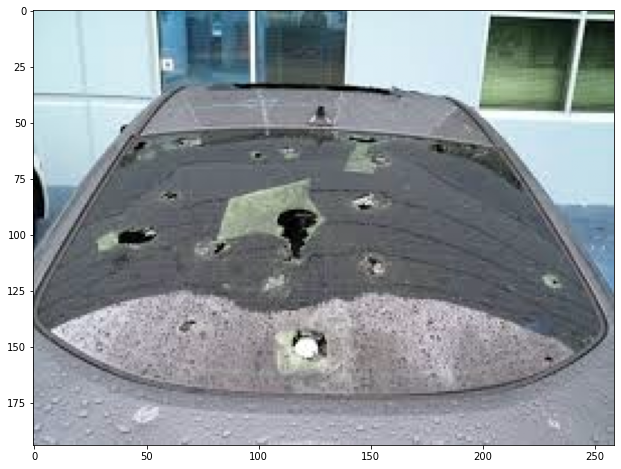

In [ ]:
plt.figure(figsize=(12,8))
plt.imshow(img,cmap='gray')

[Info] predicting output
OKAY acc= [[1.]]


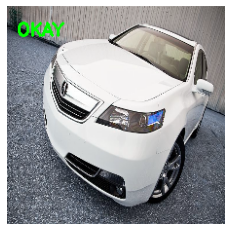

[Info] predicting output
OKAY acc= [[0.9999999]]


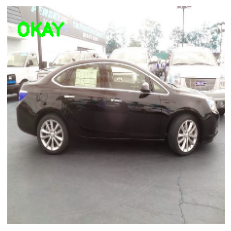

[Info] predicting output
OKAY acc= [[1.]]


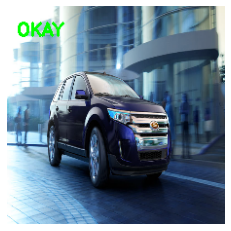

[Info] predicting output
Damage acc= [[1.5657892e-13]]


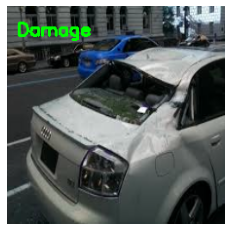

[Info] predicting output
Damage acc= [[6.2023813e-09]]


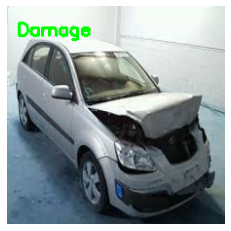

In [ ]:
import cv2
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
impath = "/content/drive/MyDrive/cardamage/validation/01-whole/0004.jpg"
impath2 = "/content/drive/MyDrive/cardamage/validation/01-whole/0048.jpg"
impath3 = "/content/drive/MyDrive/cardamage/validation/01-whole/0111.jpg"
impath4 = "/content/drive/MyDrive/cardamage/validation/00-damage/0005.JPEG"
impath5 = "/content/drive/MyDrive/cardamage/validation/00-damage/0071.JPEG"
img1 = cv2.imread(impath)
img2 = cv2.imread(impath2)
img3 = cv2.imread(impath3)
img4 = cv2.imread(impath4)
img5 = cv2.imread(impath5)

imglst = [img1,img2,img3,img4,img5]
for i in imglst:
  img = cv2.resize(i, (224, 224))
  orig = img.copy()
  img = image.img_to_array(img)
  img = np.expand_dims(img, axis=0)
  img = img/255

  print("[Info] predicting output")
  pred = model.predict(img)
  if (pred<0.5):
    print("Damage", "acc=",pred)
    cv2.putText(orig, "Damage", (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0, 255, 0), 2)
  else:
    print("OKAY", "acc=",pred)
    cv2.putText(orig, "OKAY", (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0, 255, 0), 2)


  plt.imshow(orig)
  plt.axis('off')
  plt.show()

MOBILENETv2

In [ ]:
print("[Info] loading imagenet weights...")
baseModel = MobileNetV2(weights="imagenet", include_top=False,
input_tensor=Input(shape=(224, 224, 3)))

headModel = baseModel.output
headModel = Flatten(name="flatten")(headModel)
headModel = Dense(1024, activation='relu')(headModel)
headModel = Dropout(0.5)(headModel)
headModel = Dense(1, activation='sigmoid')(headModel)

model = Model(inputs=baseModel.input, outputs=headModel)

[Info] loading imagenet weights...
9420800/9406464 [==============================] - 0s 0us/step


In [ ]:
train_datagen = ImageDataGenerator(rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')
test_datagen = ImageDataGenerator(rescale=1./255)

In [ ]:
print("[INFO] compiling model...")
opt = Adam(lr=0.001)
model.compile(loss="binary_crossentropy", optimizer=opt, metrics=["accuracy"])

[INFO] compiling model...


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
print("[INFO] training model...")
results = model.fit(training_set,validation_data=test_set,
                        epochs=10)

[INFO] training model...
Epoch 1/10
58/58 [==============================] - 43s 650ms/step - loss: 2.5531 - accuracy: 0.7853 - val_loss: 97.1173 - val_accuracy: 0.5000
Epoch 2/10
58/58 [==============================] - 36s 626ms/step - loss: 0.4906 - accuracy: 0.8500 - val_loss: 120.0195 - val_accuracy: 0.5000
Epoch 3/10
58/58 [==============================] - 37s 630ms/step - loss: 0.4449 - accuracy: 0.8462 - val_loss: 89.9375 - val_accuracy: 0.5000
Epoch 4/10
58/58 [==============================] - 38s 646ms/step - loss: 0.2986 - accuracy: 0.8853 - val_loss: 102.3847 - val_accuracy: 0.5000
Epoch 5/10
58/58 [==============================] - 36s 622ms/step - loss: 0.2612 - accuracy: 0.8880 - val_loss: 105.5394 - val_accuracy: 0.5000
Epoch 6/10
58/58 [==============================] - 36s 624ms/step - loss: 0.2444 - accuracy: 0.9016 - val_loss: 103.0949 - val_accuracy: 0.5000
Epoch 7/10
58/58 [==============================] - 36s 618ms/step - loss: 0.2357 - accuracy: 0.8995 - val_

In [ ]:
pred_probability = model.predict_generator(test_set)
predictions = pred_probability > 0.5
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(test_set.classes,predictions))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  """Entry point for launching an IPython kernel.


              precision    recall  f1-score   support

           0       0.00      0.00      0.00       230
           1       0.50      1.00      0.67       230

    accuracy                           0.50       460
   macro avg       0.25      0.50      0.33       460
weighted avg       0.25      0.50      0.33       460



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


MOBILENETV3SMALL

In [ ]:
print("[Info] loading imagenet weights...")
baseModel = MobileNetV3Small(weights="imagenet", include_top=False,
input_tensor=Input(shape=(224, 224, 3)))

headModel = baseModel.output
headModel = Flatten(name="flatten")(headModel)
headModel = Dense(1024, activation='relu')(headModel)
headModel = Dropout(0.5)(headModel)
headModel = Dense(1, activation='sigmoid')(headModel)

model = Model(inputs=baseModel.input, outputs=headModel)

[Info] loading imagenet weights...
4349952/4334752 [==============================] - 0s 0us/step


In [ ]:
train_datagen = ImageDataGenerator(rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')
test_datagen = ImageDataGenerator(rescale=1./255)

In [ ]:
print("[INFO] compiling model...")
opt = Adam(lr=0.001)
model.compile(loss="binary_crossentropy", optimizer=opt, metrics=["accuracy"])

[INFO] compiling model...


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
print("[INFO] training model...")
results = model.fit(training_set,validation_data=test_set,
                        epochs=5)
# (166)

[INFO] training model...
Epoch 1/5
58/58 [==============================] - 35s 592ms/step - loss: 0.2879 - accuracy: 0.8848 - val_loss: 2.2445 - val_accuracy: 0.5000
Epoch 2/5
58/58 [==============================] - 31s 539ms/step - loss: 0.2651 - accuracy: 0.8897 - val_loss: 2.3999 - val_accuracy: 0.5000
Epoch 3/5
58/58 [==============================] - 37s 646ms/step - loss: 0.2613 - accuracy: 0.8821 - val_loss: 2.7024 - val_accuracy: 0.5000
Epoch 4/5
58/58 [==============================] - 32s 553ms/step - loss: 0.2327 - accuracy: 0.9049 - val_loss: 0.9453 - val_accuracy: 0.5000
Epoch 5/5
58/58 [==============================] - 31s 542ms/step - loss: 0.2217 - accuracy: 0.9071 - val_loss: 0.7879 - val_accuracy: 0.5000


In [ ]:
pred_probability = model.predict_generator(test_set)
predictions = pred_probability > 0.5
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(test_set.classes,predictions))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  """Entry point for launching an IPython kernel.


              precision    recall  f1-score   support

           0       0.50      1.00      0.67       230
           1       0.00      0.00      0.00       230

    accuracy                           0.50       460
   macro avg       0.25      0.50      0.33       460
weighted avg       0.25      0.50      0.33       460



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


MOBILENETV3LARGE


In [ ]:
print("[Info] loading imagenet weights...")
baseModel = MobileNetV3Large(weights="imagenet", include_top=False,
input_tensor=Input(shape=(224, 224, 3)))

headModel = baseModel.output
headModel = Flatten(name="flatten")(headModel)
headModel = Dense(1024, activation='relu')(headModel)
headModel = Dropout(0.5)(headModel)
headModel = Dense(1, activation='sigmoid')(headModel)

model = Model(inputs=baseModel.input, outputs=headModel)

[Info] loading imagenet weights...
12697600/12683000 [==============================] - 0s 0us/step


In [ ]:
train_datagen = ImageDataGenerator(rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')
test_datagen = ImageDataGenerator(rescale=1./255)

In [ ]:
print("[INFO] compiling model...")
opt = Adam(lr=0.001)
model.compile(loss="binary_crossentropy", optimizer=opt, metrics=["accuracy"])

[INFO] compiling model...


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
print("[INFO] training model...")
results = model.fit(training_set,validation_data=test_set,
                        epochs=10)

[INFO] training model...
Epoch 1/10
58/58 [==============================] - 44s 641ms/step - loss: 1.7051 - accuracy: 0.7788 - val_loss: 7.3430 - val_accuracy: 0.5000
Epoch 2/10
58/58 [==============================] - 35s 594ms/step - loss: 0.3165 - accuracy: 0.8707 - val_loss: 1.6957 - val_accuracy: 0.4978
Epoch 3/10
58/58 [==============================] - 35s 601ms/step - loss: 0.2569 - accuracy: 0.8995 - val_loss: 5.1672 - val_accuracy: 0.5000
Epoch 4/10
58/58 [==============================] - 34s 593ms/step - loss: 0.2155 - accuracy: 0.9168 - val_loss: 2.4369 - val_accuracy: 0.5000
Epoch 5/10
58/58 [==============================] - 34s 580ms/step - loss: 0.2222 - accuracy: 0.9174 - val_loss: 6.1428 - val_accuracy: 0.5000
Epoch 6/10
58/58 [==============================] - 34s 589ms/step - loss: 0.1772 - accuracy: 0.9321 - val_loss: 4.3763 - val_accuracy: 0.5000
Epoch 7/10
58/58 [==============================] - 34s 581ms/step - loss: 0.1761 - accuracy: 0.9337 - val_loss: 3.76

In [ ]:
pred_probability = model.predict_generator(test_set)
predictions = pred_probability > 0.5
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(test_set.classes,predictions))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  """Entry point for launching an IPython kernel.


              precision    recall  f1-score   support

           0       0.50      1.00      0.67       230
           1       0.00      0.00      0.00       230

    accuracy                           0.50       460
   macro avg       0.25      0.50      0.33       460
weighted avg       0.25      0.50      0.33       460



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
RESULTS
#MOBILENET= acc:94 time:345s
#MOBILENETv2= acc:92 time:370s
#MOBILENETv3Small= acc:90 time:332s
#MOBILENETv3Large= acc:92 time:353s